In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading the cleaned data after preprocessing.
df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/Cleaned_Loan_approval_dataset.csv")

In [3]:
df.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'ExpectedReturn',
       'ProbabilityOfDefault', 'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'CreditScoreEeMini', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'TotalIncome', 'TotalLiabilities'],
      dtype='object')

In [4]:
df['NewCreditCustomer']

0         Existing_credit_customer
1         Existing_credit_customer
2              New_credit_Customer
3              New_credit_Customer
4              New_credit_Customer
                    ...           
179230         New_credit_Customer
179231    Existing_credit_customer
179232    Existing_credit_customer
179233         New_credit_Customer
179234    Existing_credit_customer
Name: NewCreditCustomer, Length: 179235, dtype: object

In [5]:
# Get the 90th percentile threshold
quantile_threshold = 100000

# Filter rows above the 90th percentile
high_liabilities_df = df[df['FreeCash'] > quantile_threshold]

print("Rows in the top 10% of TotalLiabilities:")
print(high_liabilities_df['FreeCash'])


Rows in the top 10% of TotalLiabilities:
21761    133200.38
21868    158748.64
Name: FreeCash, dtype: float64


# Considering the variables for predicting the loan amount

Considering the variables which are useful for predicting loan amount. This includes borrower's personal and financial aspects.

In [6]:
loan_estimate_features = ['NewCreditCustomer', 'VerificationType',
       'Age', 'Gender', 'AppliedAmount','Amount',
       'UseOfLoan', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType','TotalIncome', 'TotalLiabilities','DebtToIncome', 'FreeCash', 'Rating',
       'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan']

loan_df= df[loan_estimate_features]
loan_df.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
0,Existing_credit_customer,Income_expenses_verified,53,Female,2125.0,2125.0,Home_improvement,Retiree,Not-known,Other,Owner,354.0,499.09,26.29,10.92,C,M,1000.0,1.0,500.0
1,Existing_credit_customer,Income_unverified,50,Female,3000.0,3000.0,Business,Entrepreneur,MoreThan5Years,Retail_and_wholesale,Owner,900.0,740.45,30.58,78.80,B,M,1000.0,1.0,1800.0
2,New_credit_Customer,Income_expenses_verified,44,Male,10630.0,9100.0,Business,Entrepreneur,UpTo3Years,Transport_and_warehousing,Mortgage,1200.0,915.00,26.71,349.43,A,M,1000.0,0.0,0.0
3,New_credit_Customer,Income_verified,42,Male,1500.0,1500.0,Home_improvement,Fully-Employed,UpTo5Years,Other,Living_with_parents,863.0,351.00,7.36,449.47,F,M3,1000.0,0.0,0.0
4,New_credit_Customer,Income_expenses_verified,34,Female,1595.0,1090.0,Other,Retiree,Not-known,Other,Tenant_pre_furnished_property,697.0,947.00,36.04,95.81,HR,M5,1000.0,0.0,0.0


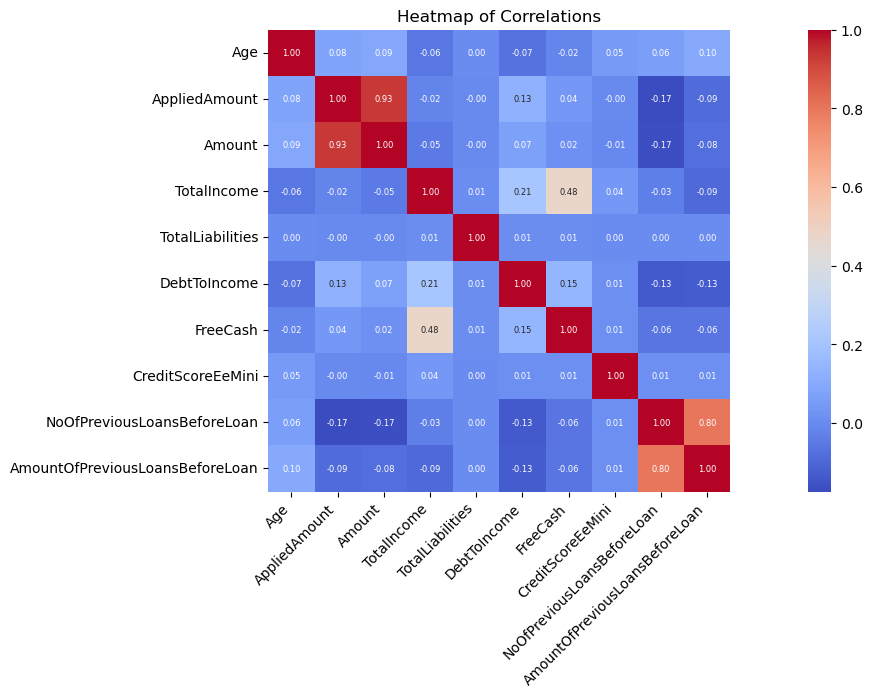

In [7]:
# Analysing the heatmap to find out relationships between the variables.

df1 = loan_df.select_dtypes(include=['number'])
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Creating heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6},fmt=".2f", square=True)
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.show()

Inferences from the heatmap:
1. Higher loan amounts and applied amounts lead to higher monthly payments.
2. Amount of previous loans depend upon number of previous loans.
3. Loan amount granted strongly matches with the loan amount applied by the borrower.
4. Debt to income is determined from existing liabilites.
5. Free cash depends upon the total income.

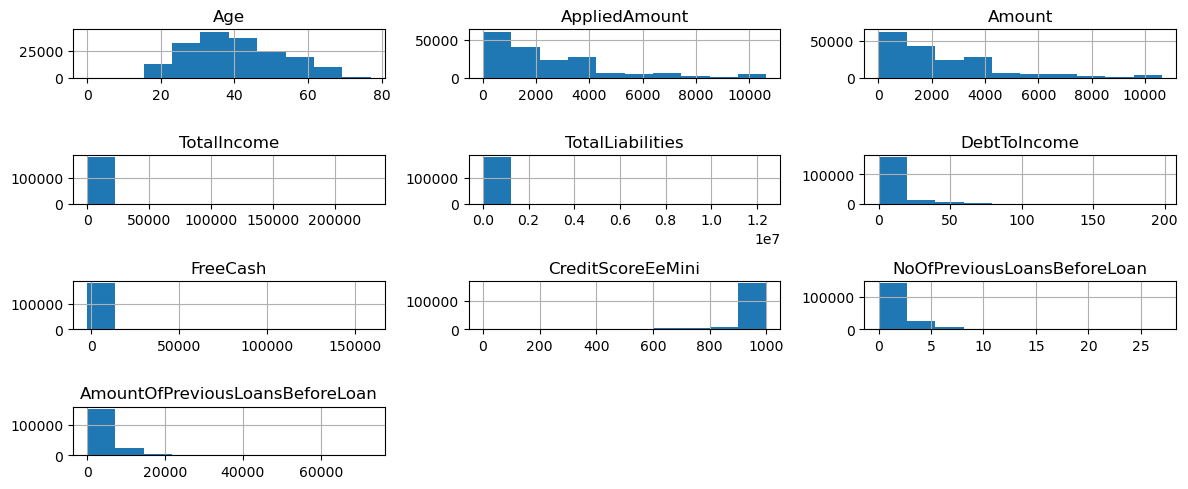

In [8]:
# Plotting histograms for all numerical variables to check the distribution of the variables.
df1.hist(figsize=(12, 5), bins=10)
plt.tight_layout()
plt.show()

In [9]:
loan_df.columns

Index(['NewCreditCustomer', 'VerificationType', 'Age', 'Gender',
       'AppliedAmount', 'Amount', 'UseOfLoan', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'TotalIncome', 'TotalLiabilities', 'DebtToIncome',
       'FreeCash', 'Rating', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan'],
      dtype='object')

In [10]:
import joblib

label_encoders = joblib.load('C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/label_encoders.pkl')

# Getting the categorical columns.
categorical_columns = loan_df.select_dtypes(include=['object']).columns.tolist()

# Encoding the categorical columns.
for column in categorical_columns:
    if column in label_encoders:
        encoder = label_encoders[column]
        loan_df[column] = encoder.transform(loan_df[column])  

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_27004\4220035955.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = encoder.transform(loan_df[column])  # Use the specific encoder for each column
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_27004\4220035955.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = encoder.transform(loan_df[column])  # Use the specific encoder for each column
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_27004\4220035955.py:11: SettingWithCopyW

In [12]:
loan_df.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
0,0,0,53,0,2125.0,2125.0,7,3,1,13,7,354.0,499.09,26.29,10.92,3,0,1000.0,1.0,500.0
1,0,1,50,0,3000.0,3000.0,3,0,0,17,7,900.0,740.45,30.58,78.80,2,0,1000.0,1.0,1800.0
2,1,0,44,1,10630.0,9100.0,3,0,6,18,5,1200.0,915.00,26.71,349.43,0,0,1000.0,0.0,0.0
3,1,3,42,1,1500.0,1500.0,7,1,8,13,4,863.0,351.00,7.36,449.47,6,4,1000.0,0.0,0.0
4,1,0,34,0,1595.0,1090.0,10,3,1,13,9,697.0,947.00,36.04,95.81,7,6,1000.0,0.0,0.0


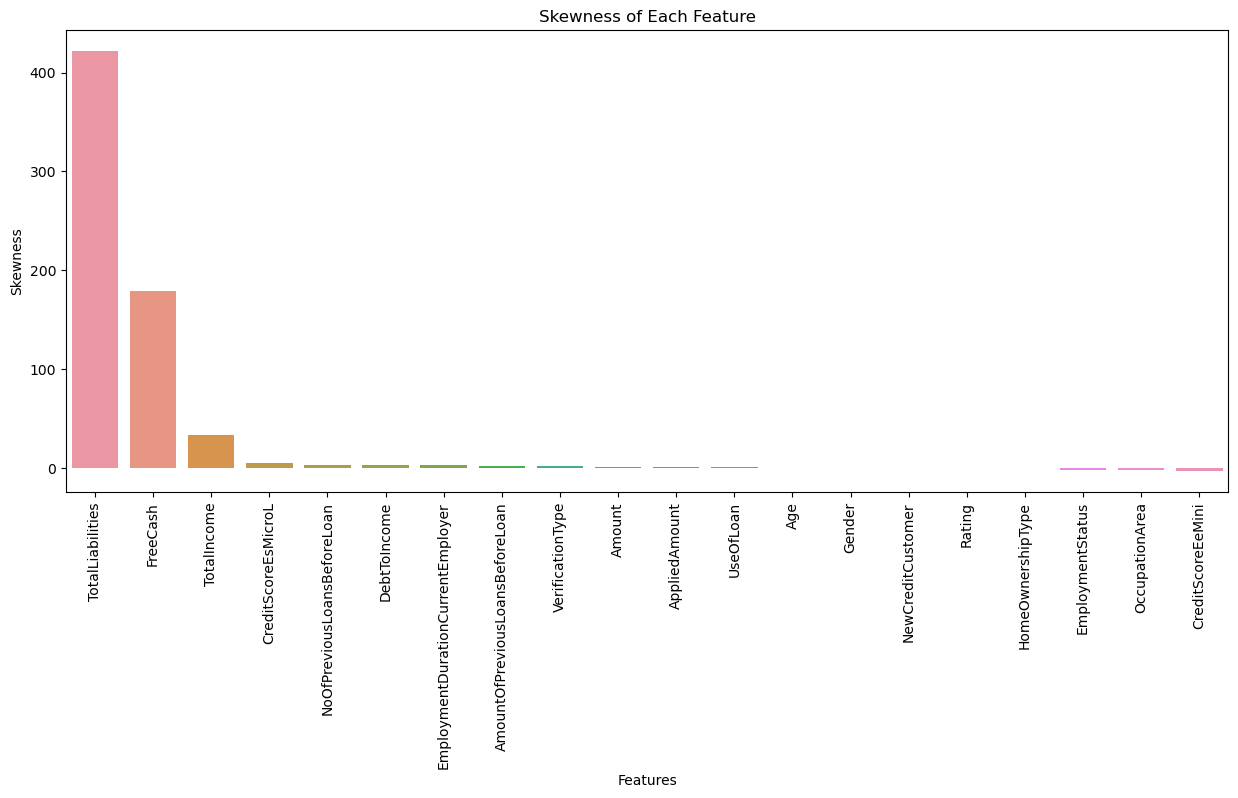

In [13]:
# Checking skewness of each  numerical column
skewed_features = loan_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(15, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [14]:
# Performing Log transformations to the columns where the skeweness is more than 2.
threshold = 2

# Selecting features to transform based on skewness
features_to_transform = skewed_features[skewed_features.abs() > threshold].index.tolist()

# Apply transformations
for column in features_to_transform:
    if skewed_features[column] > 0:
        if (loan_df[column] >= 0).all(): 
            loan_df[column] = np.log1p(loan_df[column])
        else:
            min_value = loan_df[column].min()
            loan_df[column] = loan_df[column] + abs(min_value) + 1 
            loan_df[column] = np.log1p(loan_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_27004\3951622523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = np.log1p(loan_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_27004\3951622523.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df[column] = loan_df[column] + abs(min_value) + 1
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_27004\3951622523.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [15]:
features_to_transform

['TotalLiabilities',
 'FreeCash',
 'TotalIncome',
 'CreditScoreEsMicroL',
 'NoOfPreviousLoansBeforeLoan',
 'DebtToIncome',
 'EmploymentDurationCurrentEmployer',
 'AmountOfPreviousLoansBeforeLoan',
 'OccupationArea',
 'CreditScoreEeMini']

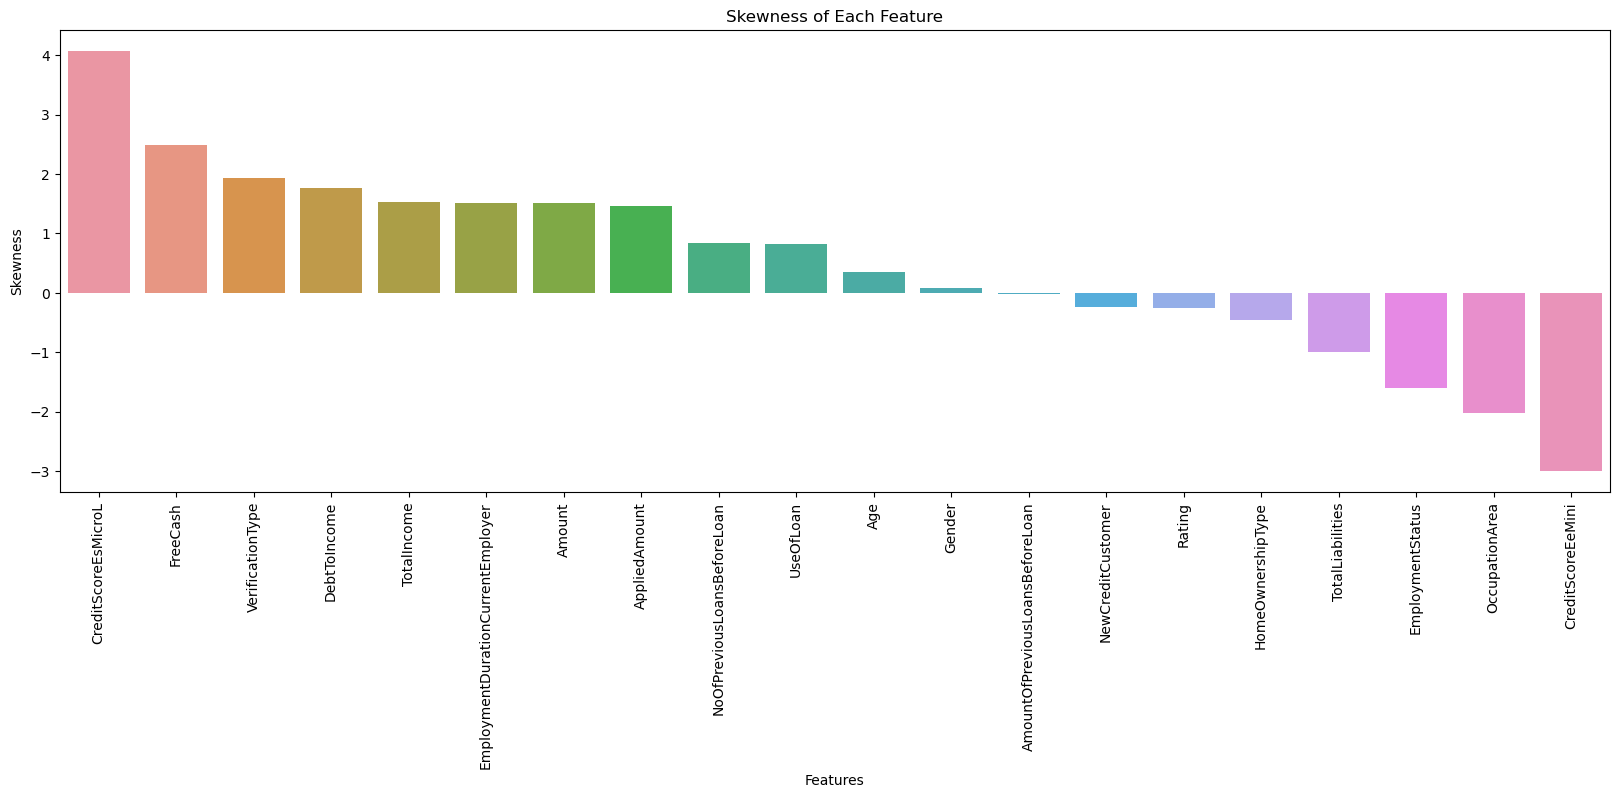

In [16]:
# Checking the skewness of each  numerical column after perfroming the transformations.
skewed_features = loan_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values.
plt.figure(figsize=(20, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90)  
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

The skeweness is now within the threshold which is quite tolerable. This indicates that the data is now symmetric in distribution.

In [17]:
loan_df.head()

,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,TotalIncome,TotalLiabilities,DebtToIncome,FreeCash,Rating,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan
0,0,0,53,0,2125.0,2125.0,7,3,0.693147,13,7,5.872118,6.214788,3.306520,7.760007,3,0.000000,1000.0,0.693147,6.216606
1,0,1,50,0,3000.0,3000.0,3,0,0.000000,17,7,6.803505,6.608608,3.452524,7.788543,2,0.000000,1000.0,0.693147,7.496097
2,1,0,44,1,10630.0,9100.0,3,0,1.945910,18,5,7.090910,6.820016,3.321793,7.894851,0,0.000000,1000.0,0.000000,0.000000
3,1,3,42,1,1500.0,1500.0,7,1,2.197225,13,4,6.761573,5.863631,2.123458,7.931454,6,1.609438,1000.0,0.000000,0.000000
4,1,0,34,0,1595.0,1090.0,10,3,0.693147,13,9,6.548219,6.854355,3.611998,7.795568,7,1.945910,1000.0,0.000000,0.000000


In [18]:
loan_df.to_csv('Cleaned_Loan_amount_dataset.csv', index=False)

# Using Random Forest to understand the feature importance on the target variable which is the loan amount.

In [ ]:
# Performing normalization of data using Robust Scaler.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = loan_df.drop(columns=['Amount'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = loan_df[['Amount']] 
y = scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

In [ ]:
# Plotting the top 10 feature importances.
top_n = 10
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45) 
plt.show()